In [2]:
import matplotlib.pyplot as plt

In [1]:
!pip install nltk

In [3]:
print("\nPobieranie leksykonu VADER...")
import nltk
nltk.download('vader_lexicon')


Pobieranie leksykonu VADER...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/all_musk_posts.csv')


/tmp/ipython-input-1210488283.py:2: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/all_musk_posts.csv')


In [6]:
df = pd.read_csv('/content/drive/MyDrive/all_musk_posts.csv', low_memory=False)

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
sia = SentimentIntensityAnalyzer()

In [9]:
import matplotlib.pyplot as plt
import os

In [10]:
os.makedirs('images', exist_ok=True)

In [11]:
plt.savefig('images/sentiment_analysis_chart.png')

<Figure size 640x480 with 0 Axes>

In [12]:

df['sentiment_score'] = df['fullText'].apply(lambda text: sia.polarity_scores(text)['compound'])

print(df[['fullText', 'sentiment_score']].head())

                                            fullText  sentiment_score
0  RT @einarvollset: I read @paulg’s  “How to Mak...           0.0000
1                            https://t.co/Zjn6r15lrR           0.0000
2  RT @BillyM2k: dude bookmarks are an awesome tw...           0.6597
3                         Event Horizon Balance Beam           0.0000
4  RT @BillyM2k: @elonmusk oh that’s actually pre...           0.6996


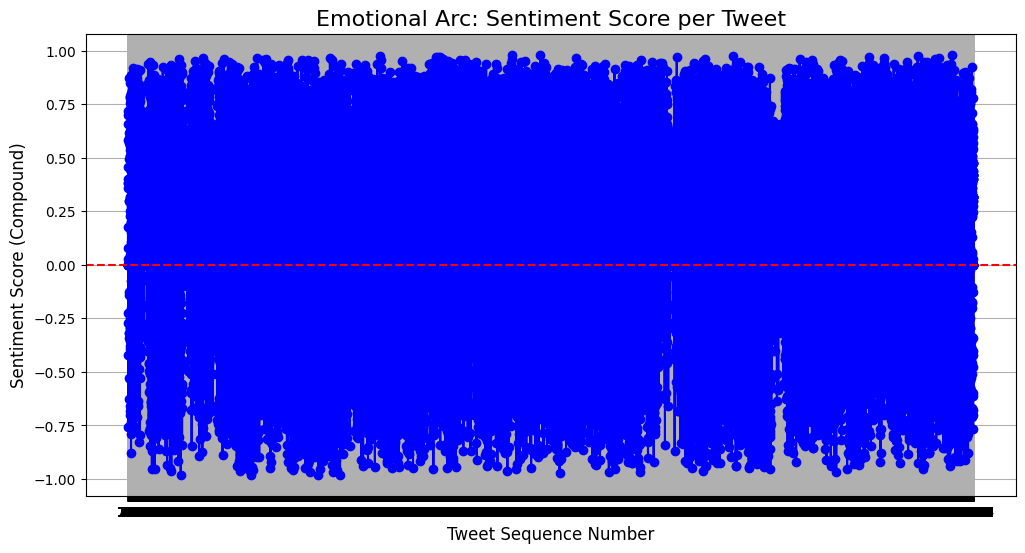

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot(df.index, df['sentiment_score'], marker='o', linestyle='-', color='b')

plt.axhline(y=0, color='r', linestyle='--')

plt.title('Emotional Arc: Sentiment Score per Tweet', fontsize=16)
plt.xlabel('Tweet Sequence Number', fontsize=12)
plt.ylabel('Sentiment Score (Compound)', fontsize=12)
plt.grid(True)
plt.xticks(df.index)

plt.savefig('images/sentiment_analysis_chart.png')

plt.show()

In [14]:
print(df.columns)

Index(['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount',
       'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount',
       'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId',
       'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote',
       'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote',
       'retweet', 'sentiment_score'],
      dtype='object')


In [15]:
df['createdAt'] = pd.to_datetime(df['createdAt'])

In [16]:
df.set_index('createdAt', inplace=True)

In [17]:
monthly_sentiment = df['sentiment_score'].resample('M').mean()

/tmp/ipython-input-902281505.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df['sentiment_score'].resample('M').mean()


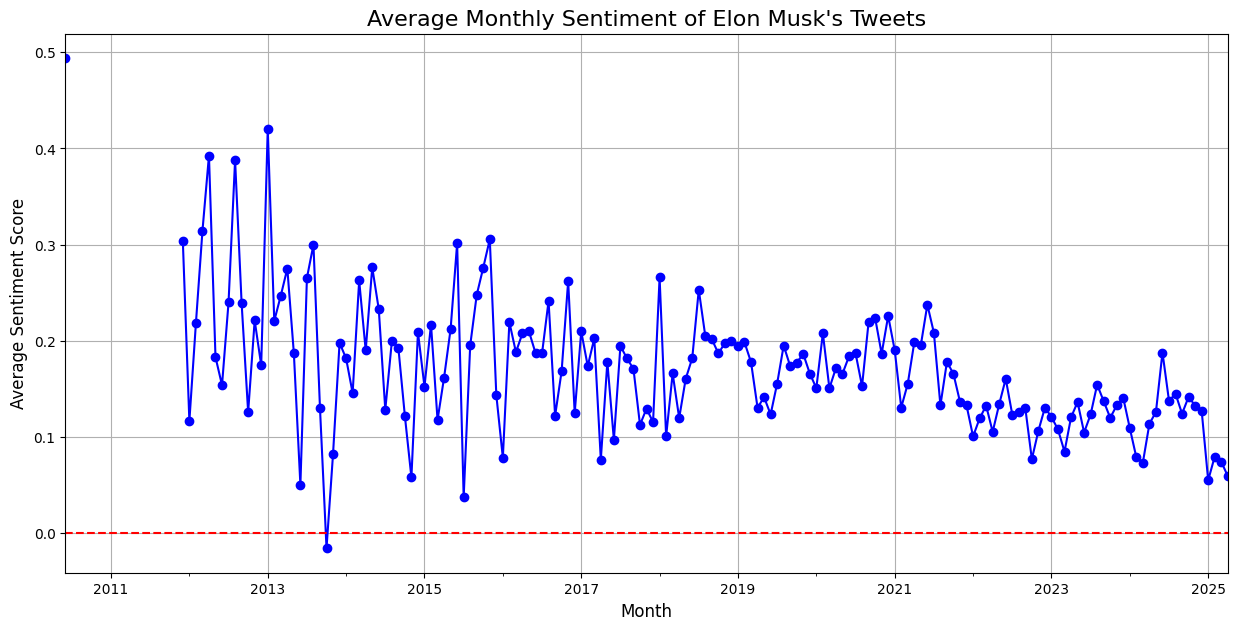

In [18]:
plt.figure(figsize=(15, 7))
monthly_sentiment.plot(marker='o', linestyle='-', color='b')

plt.title('Average Monthly Sentiment of Elon Musk\'s Tweets', fontsize=16)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

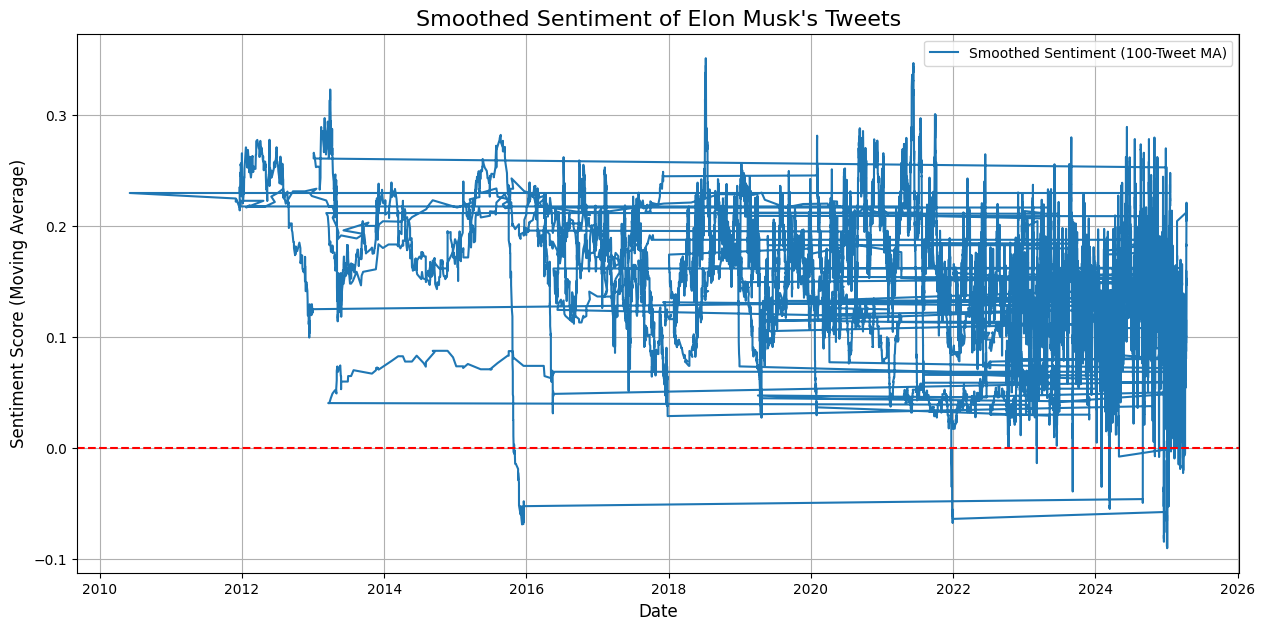

In [19]:
df['sentiment_ma'] = df['sentiment_score'].rolling(window=100).mean()
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['sentiment_ma'], label='Smoothed Sentiment (100-Tweet MA)')
plt.title('Smoothed Sentiment of Elon Musk\'s Tweets', fontsize=16)
plt.ylabel('Sentiment Score (Moving Average)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
!pip install yfinance

In [21]:
print(df.columns)

Index(['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount',
       'likeCount', 'quoteCount', 'viewCount', 'bookmarkCount', 'isReply',
       'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername',
       'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled',
       'possiblySensitive', 'quoteId', 'quote', 'retweet', 'sentiment_score',
       'sentiment_ma'],
      dtype='object')


In [22]:
df.head()

,id,url,twitterUrl,fullText,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,...,isPinned,isRetweet,isQuote,isConversationControlled,possiblySensitive,quoteId,quote,retweet,sentiment_score,sentiment_ma
createdAt,,,,,,,,,,,,,,,,,,,,,
2023-05-07 10:36:27+00:00,1655159652990976000,https://x.com/elonmusk/status/1655159652990976000,https://twitter.com/elonmusk/status/1655159652...,RT @einarvollset: I read @paulg’s “How to Mak...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
2023-05-13 05:48:56+00:00,1657261624867299339,https://x.com/elonmusk/status/1657261624867299339,https://twitter.com/elonmusk/status/1657261624...,https://t.co/Zjn6r15lrR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
2023-02-09 20:03:00+00:00,1623774484795920384,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/status/1623774484...,RT @BillyM2k: dude bookmarks are an awesome tw...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6597,NaN
2023-05-12 05:52:26+00:00,1656900119202254854,https://x.com/elonmusk/status/1656900119202254854,https://twitter.com/elonmusk/status/1656900119...,Event Horizon Balance Beam,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN
2023-01-20 20:23:27+00:00,1616531874763116544,https://x.com/elonmusk/status/1616531874763116544,https://twitter.com/elonmusk/status/1616531874...,RT @BillyM2k: @elonmusk oh that’s actually pre...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6996,NaN


In [23]:
df.columns = df.columns.str.strip()

In [24]:
print("Nazwy kolumn zostały wyczyszczone!")
print(df.columns.tolist())

Nazwy kolumn zostały wyczyszczone!
['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet', 'sentiment_score', 'sentiment_ma']


In [25]:
print("--- STAN DataFrame'u TUŻ PRZED BŁĘDEM ---")
print("Liczba wierszy:", len(df))
print("Lista kolumn:", df.columns.tolist())
print("-----------------------------------------")

--- STAN DataFrame'u TUŻ PRZED BŁĘDEM ---
Liczba wierszy: 55099
Lista kolumn: ['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet', 'sentiment_score', 'sentiment_ma']
-----------------------------------------


In [26]:
import yfinance as yf
import pandas as pd

df['createdAt'] = pd.to_datetime(df['createdAt'])

start_date = df['createdAt'].min()
end_date = df['createdAt'].max()

tsla_df = yf.download('TSLA', start=start_date, end=end_date)

print("Pobrane dane giełdowe Tesli:")
tsla_df.head()

KeyError: 'createdAt'

In [27]:
import csv

file_path = '/content/drive/MyDrive/all_musk_posts.csv'
header_comma_count = 0

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        header = f.readline().strip().split(',')
        header_column_count = len(header)
        print(f"Oczekiwana liczba kolumn (na podstawie nagłówka): {header_column_count}")

         for i, line in enumerate(f, 2):
            row_column_count = len(line.strip().split(','))
            if row_column_count != header_column_count:
                print(f"\nBŁĄD: Znaleziono pierwszy źle sformatowany wiersz w linii nr {i}.")
                print(f"Oczekiwano {header_column_count} kolumn, a znaleziono {row_column_count}.")
                print(f"Początek tego wiersza: {line[:100]}...")
                break
except Exception as e:
    print(f"Wystąpił błąd podczas czytania pliku: {e}")

Oczekiwana liczba kolumn (na podstawie nagłówka): 24

BŁĄD: Znaleziono pierwszy źle sformatowany wiersz w linii nr 4.
Oczekiwano 24 kolumn, a znaleziono 25.
Początek tego wiersza: 1623774484795920384,https://x.com/elonmusk/status/1623774484795920384,https://twitter.com/elonmusk/s...


In [28]:
try:
    df = pd.read_csv(
        '/content/drive/MyDrive/all_musk_posts.csv',
        engine='python',
        on_bad_lines='warn'
    )
    print("Plik wczytany z użyciem silnika 'python'. Sprawdź kolumny:")
    print(df.columns.tolist())
except Exception as e:
    print(f"Niestety, nawet silnik 'python' nie dał rady: {e}")

Plik wczytany z użyciem silnika 'python'. Sprawdź kolumny:
['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet']


In [29]:
print(df.columns.tolist())

['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet']


In [30]:
import pandas as pd

file_path = '/content/drive/MyDrive/all_musk_posts.csv'
df = pd.read_csv(file_path, low_memory=False)

print("Plik wczytany. Oryginalne nazwy kolumn (mogą mieć ukryte spacje):")
print(df.columns.tolist())

df.columns = df.columns.str.strip()

print("\nNazwy kolumn zostały wyczyszczone! Teraz są bezpieczne w użyciu:")
print(df.columns.tolist())

try:
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    print("\n✅ SUKCES! Kolumna 'createdAt' została pomyślnie przekonwertowana na format daty.")

    print("\nOto jak wyglądają teraz Twoje dane z poprawną datą:")
    print(df[['fullText', 'createdAt']].head())
except KeyError:
    print("\n❌ BŁĄD: Mimo czyszczenia, kolumna 'createdAt' nadal nie została znaleziona.")
    print("Sprawdź, czy na pewno używasz właściwego pliku CSV.")

Plik wczytany. Oryginalne nazwy kolumn (mogą mieć ukryte spacje):
['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet']

Nazwy kolumn zostały wyczyszczone! Teraz są bezpieczne w użyciu:
['id', 'url', 'twitterUrl', 'fullText', 'retweetCount', 'replyCount', 'likeCount', 'quoteCount', 'viewCount', 'createdAt', 'bookmarkCount', 'isReply', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'inReplyToUsername', 'isPinned', 'isRetweet', 'isQuote', 'isConversationControlled', 'possiblySensitive', 'quoteId', 'quote', 'retweet']

✅ SUKCES! Kolumna 'createdAt' została pomyślnie przekonwertowana na format daty.

Oto jak wyglądają teraz Twoje dane z poprawną datą:
                                            fullText 

Krok 1: Instalowanie i importowanie bibliotek...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--- Gotowe! ---

Krok 2: Wczytywanie i przygotowywanie danych o tweetach...
--- Dane wczytane i przygotowane! ---

Krok 3: Przeprowadzanie analizy sentymentu...
--- Analiza sentymentu zakończona! ---

Krok 4: Pobieranie i łączenie danych giełdowych...


/tmp/ipython-input-2539142577.py:51: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_df = yf.download('TSLA', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


--- Dane giełdowe pobrane i połączone! ---

Krok 5: Tworzenie finalnego wykresu...


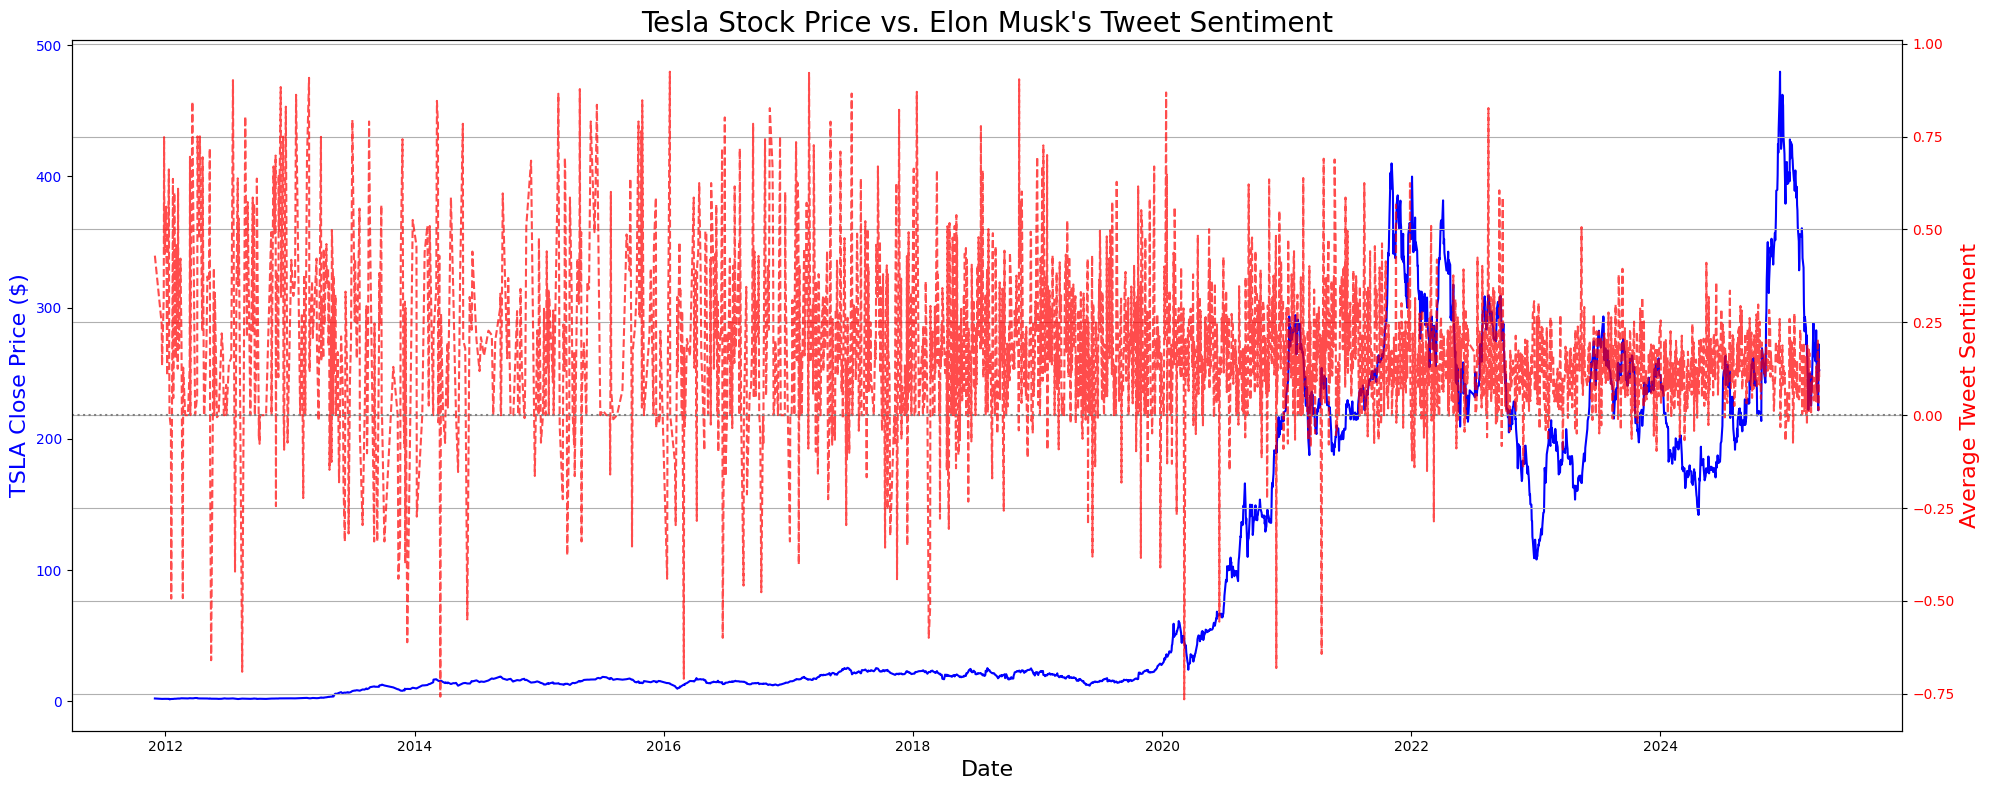


✅ Analiza zakończona! Wykres został zapisany w folderze 'images'.


In [31]:
print("Krok 1: Instalowanie i importowanie bibliotek...")
!pip install yfinance nltk

import pandas as pd
import yfinance as yf
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import os

nltk.download('vader_lexicon')
print("--- Gotowe! ---")

print("\nKrok 2: Wczytywanie i przygotowywanie danych o tweetach...")
file_path = '/content/drive/MyDrive/all_musk_posts.csv'
df = pd.read_csv(file_path, low_memory=False)
df.columns = df.columns.str.strip()

df['createdAt'] = pd.to_datetime(df['createdAt'])
print("--- Dane wczytane i przygotowane! ---")
print("\nKrok 3: Przeprowadzanie analizy sentymentu...")

sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['fullText'].apply(lambda text: sia.polarity_scores(str(text))['compound'])
print("--- Analiza sentymentu zakończona! ---")


print("\nKrok 4: Pobieranie i łączenie danych giełdowych...")

daily_sentiment = df.groupby(df['createdAt'].dt.date).agg({'sentiment_score': 'mean'})
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

start_date = daily_sentiment.index.min()
end_date = daily_sentiment.index.max()
tsla_df = yf.download('TSLA', start=start_date, end=end_date)


tsla_df.columns = tsla_df.columns.get_level_values(0)
# --------------------------------------------------------------------

combined_df = pd.merge(tsla_df, daily_sentiment, how='inner', left_index=True, right_index=True)
print("--- Dane giełdowe pobrane i połączone! ---")


print("\nKrok 5: Tworzenie finalnego wykresu...")
os.makedirs('images', exist_ok=True)

fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.set_title('Tesla Stock Price vs. Elon Musk\'s Tweet Sentiment', fontsize=20)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('TSLA Close Price ($)', color='blue', fontsize=16)
ax1.plot(combined_df.index, combined_df['Close'], color='blue', label='TSLA Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Tweet Sentiment', color='red', fontsize=16)
ax2.plot(combined_df.index, combined_df['sentiment_score'], color='red', linestyle='--', alpha=0.7, label='Tweet Sentiment')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(y=0, color='gray', linestyle=':')
plt.grid(True)
fig.tight_layout()
plt.savefig('images/sentiment_vs_stock_price.png')
plt.show()

print("\n✅ Analiza zakończona! Wykres został zapisany w folderze 'images'.")

# Nowa sekcja

# Nowa sekcja